In [218]:
import torch
import torch.nn as nn
from PIL import Image
from torchvision import transforms
from torchinfo import summary

In [219]:
trans = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor()
])

In [220]:
img = Image.open("/Users/arponbiswas/Computer-Vision-Projects/Image_classification_projects/PC_Parts_Image_Classification/Data/pc_parts_ready/monitor/1.jpg")

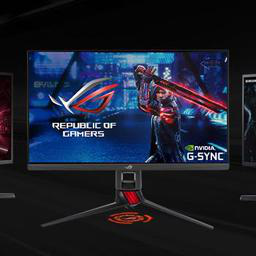

In [221]:
img

In [222]:
trans(img).shape

torch.Size([3, 256, 256])

In [223]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.version = '1.0'
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=6, kernel_size=6, stride=4, padding=0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=3),
        )
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(6 * 21 * 21, 14)

    def forward(self, x):
        out = self.layer1(x)
        out = self.flatten(out)
        out = self.fc1(out)
        return out

In [224]:
model = SimpleCNN()

In [225]:
model

SimpleCNN(
  (layer1): Sequential(
    (0): Conv2d(3, 6, kernel_size=(6, 6), stride=(4, 4))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
  )
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=2646, out_features=14, bias=True)
)

In [226]:
summary(
    model, 
    input_size=(1, 3, 256, 256), 
    col_names=[
        "kernel_size", "input_size", "output_size", 
        "num_params", "mult_adds", "trainable"
    ], 
    row_settings=["var_names", "depth"],
)

Layer (type (var_name):depth-idx)        Kernel Shape              Input Shape               Output Shape              Param #                   Mult-Adds                 Trainable
SimpleCNN (SimpleCNN)                    --                        [1, 3, 256, 256]          [1, 14]                   --                        --                        True
├─Sequential (layer1): 1-1               --                        [1, 3, 256, 256]          [1, 6, 21, 21]            --                        --                        True
│    └─Conv2d (0): 2-1                   [6, 6]                    [1, 3, 256, 256]          [1, 6, 63, 63]            654                       2,595,726                 True
│    └─ReLU (1): 2-2                     --                        [1, 6, 63, 63]            [1, 6, 63, 63]            --                        --                        --
│    └─MaxPool2d (2): 2-3                3                         [1, 6, 63, 63]            [1, 6, 21, 21]          

In [227]:
model(trans(img).unsqueeze(0))

tensor([[ 0.0053,  0.0432,  0.2388, -0.3584, -0.0515, -0.0362, -0.1692,  0.2096,
         -0.0715,  0.0018,  0.0365, -0.0207, -0.0529,  0.0039]],
       grad_fn=<AddmmBackward0>)

In [231]:
torch.softmax(model(trans(img).unsqueeze(0)), dim=1)

tensor([[0.0723, 0.0751, 0.0913, 0.0502, 0.0683, 0.0693, 0.0607, 0.0886, 0.0669,
         0.0720, 0.0746, 0.0704, 0.0682, 0.0722]], grad_fn=<SoftmaxBackward0>)